In [189]:
#importation des librairies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [168]:
data = pd.read_csv('/Users/mac/Downloads/Microsoft_malware_dataset_min.csv')

In [163]:
data.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [169]:
data.shape

(100000, 10)

In [171]:
# Exploration de base des données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB
None


In [172]:
print(data.describe())

       HasDetections  Wdft_IsGamer  Census_IsVirtualDevice  \
count  100000.000000  96585.000000            99815.000000   
mean        0.499280      0.281607                0.006642   
std         0.500002      0.449785                0.081230   
min         0.000000      0.000000                0.000000   
25%         0.000000      0.000000                0.000000   
50%         0.000000      0.000000                0.000000   
75%         1.000000      1.000000                0.000000   
max         1.000000      1.000000                1.000000   

       Census_HasOpticalDiskDrive      Firewall         SMode   IsProtected  \
count               100000.000000  98924.000000  94068.000000  99609.000000   
mean                     0.075850      0.977326      0.000351      0.944864   
std                      0.264759      0.148863      0.018727      0.228246   
min                      0.000000      0.000000      0.000000      0.000000   
25%                      0.000000      1.00000

In [174]:
# Rapports de profilage de pandas
profile = ProfileReport(data)
profile.to_file("rapport_profilage.html")

In [175]:
# Gestion des valeurs manquantes et corrompues
data.dropna(inplace=True)

In [176]:
# Suppression des doublons
data.drop_duplicates(inplace=True)

In [177]:
# Gestion des valeurs aberrantes (vous pouvez utiliser différentes techniques ici)
# Par exemple, pour détecter les valeurs aberrantes dans une colonne 'col', vous pouvez utiliser :
# Q1 = data['col'].quantile(0.25)
# Q3 = data['col'].quantile(0.75)
# IQR = Q3 - Q1
# data = data[(data['col'] >= Q1 - 1.5 * IQR) & (data['col'] <= Q3 + 1.5 * IQR)]


In [178]:
# Encodage des caractéristiques catégorielles
data = pd.get_dummies(data)

In [179]:
# Préparation du jeu de données pour la modélisation
X = data.drop('HasDetections', axis=1)
y = data['HasDetections']


In [180]:
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [181]:
# Modélisation avec un arbre de décision
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [182]:
# Courbe ROC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


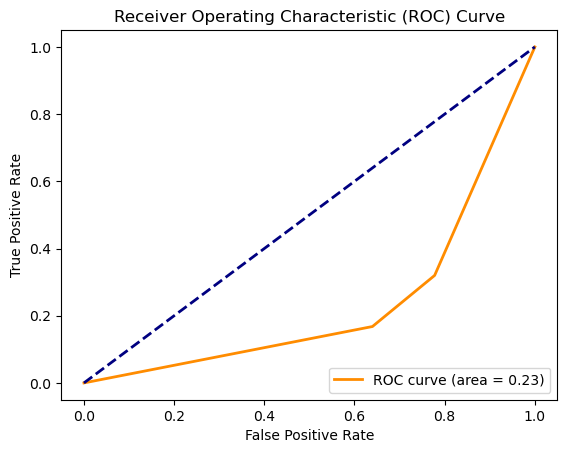

In [183]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Partie 2 : Apprentissage non supervisé

In [185]:
# Suppression de la variable cible
data_unsupervised = data.drop('HasDetections', axis=1)


In [207]:
# Application de KMeans
kmeans = KMeans(n_clusters=2) 
data_unsupervised['cluster'] = kmeans.fit_predict(data_unsupervised)


In [208]:
# Tracer les clusters
# Utilisez une technique de réduction de dimension comme PCA pour visualiser les clusters en 2D ou 3D

# Trouver le paramètre K optimal
# Utilisez différentes méthodes comme la méthode du coude (elbow method) pour trouver le nombre optimal de clusters

# Interprétation des résultats avec HasDetections qui est la cible
# Comparez la distribution des clusters avec la variable cible d'origine

In [209]:
# Tracer les clusters en utilisant PCA pour la visualisation en 2D
# Standardiser les données avant d'appliquer PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_unsupervised)

In [210]:
# Réduire la dimension à 2 pour la visualisation
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


In [211]:
# Créer un DataFrame avec les résultats de PCA et les clusters
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = data_unsupervised['cluster']


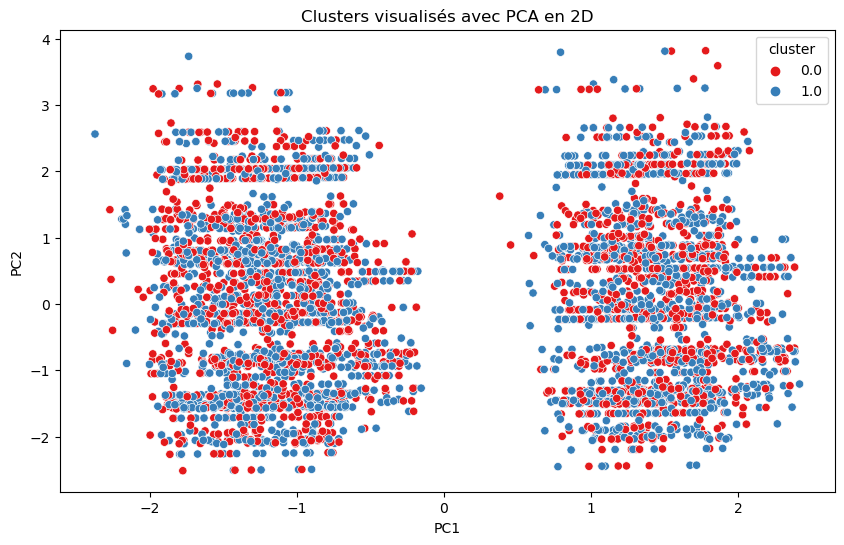

In [212]:
# Tracer les clusters en 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='Set1', legend='full')
plt.title('Clusters visualisés avec PCA en 2D')
plt.show()


In [213]:
# Trouver le paramètre K optimal en utilisant la méthode du coude (Elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_unsupervised.drop('cluster', axis=1))
    inertia.append(kmeans.inertia_)


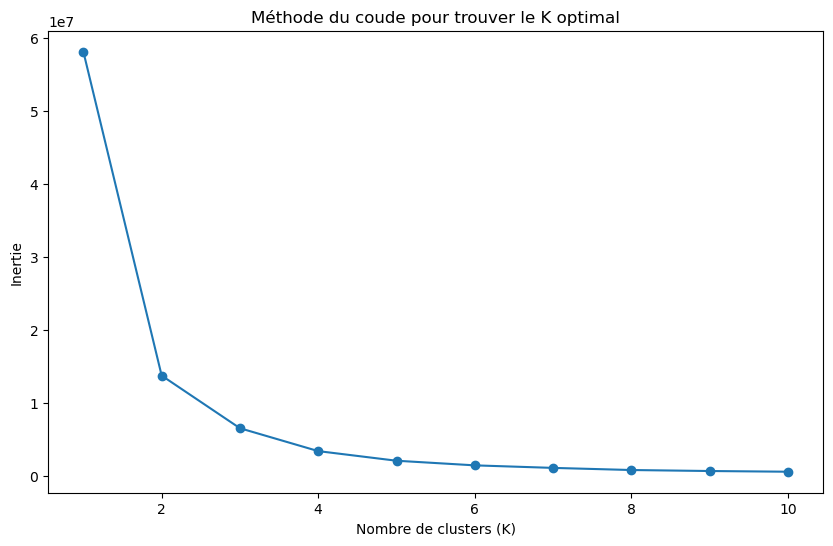

In [214]:
# Tracer la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour trouver le K optimal')
plt.show()

#Interpretation : On a obtenu deux groupes distincts des donnees avec un k = 2.